<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Food_vision_Using_FineTuning_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remaking our Food Vision App using Fine Tuning Transfer Learning

In [97]:
!wget https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py

--2022-12-03 19:54:28--  https://raw.githubusercontent.com/MoizAhmed2517/Deep_Learning_Projects/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10169 (9.9K) [text/plain]
Saving to: ‘helper_function.py.1’

helper_function.py. 100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-12-03 19:54:28 (108 MB/s) - ‘helper_function.py.1’ saved [10169/10169]



In [98]:
#Importing all helper function from Github that made in previous notebooks
from helper_function import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import zipfile
import os
import pathlib
import tensorflow as tf
import random

In [3]:
# Using tf.keras.applications (Pretrained models) for training our dataset

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-12-03 18:37:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   118MB/s    in 1.4s    

2022-12-03 18:37:24 (118 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                  image_size=IMG_SIZE,
                                                                  label_mode="categorical",
                                                                  batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE) 

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="Input_Layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf.keras.layers.Dense(10, activation="softmax", name="Output_Layer")(x)
model_0 = tf.keras.Model(inputs, output)

16705208/16705208 [==============================] - 0s 0us/step


In [10]:
model_0.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_0 = model_0.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="Feature_Extraction" )])

Saving TensorBoard log files to: transfer_learning/Feature_Extraction/20221203-183736
Epoch 1/5
24/24 [==============================] - 23s 415ms/step - loss: 1.8413 - accuracy: 0.4400 - val_loss: 1.2694 - val_accuracy: 0.7340
Epoch 2/5
24/24 [==============================] - 8s 325ms/step - loss: 1.0743 - accuracy: 0.7680 - val_loss: 0.8489 - val_accuracy: 0.8248
Epoch 3/5
24/24 [==============================] - 8s 323ms/step - loss: 0.7703 - accuracy: 0.8280 - val_loss: 0.6849 - val_accuracy: 0.8452
Epoch 4/5
24/24 [==============================] - 8s 326ms/step - loss: 0.6220 - accuracy: 0.8680 - val_loss: 0.6062 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 8s 331ms/step - loss: 0.5489 - accuracy: 0.8720 - val_loss: 0.5525 - val_accuracy: 0.8612


In [11]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 Output_Layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

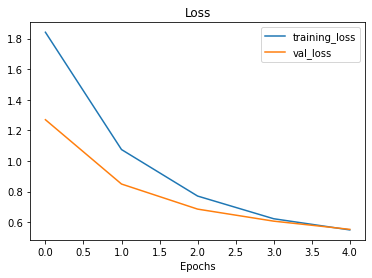

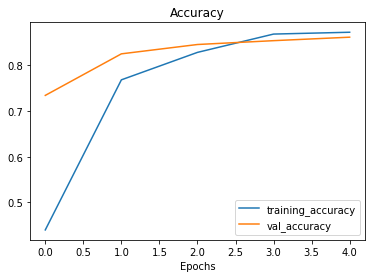

In [14]:
plot_loss_curves(history_0)

# Getting Feature vector from out trained model

In [15]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 



In [16]:
GAPT = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Feature output tensor:\n {GAPT} \n")

Feature output tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 



In [17]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [18]:
GMPT = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
GMPT

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Performing some experiment with Fine tuning transfer learning

### Model#1: Using feature extraction transfer learning with 1% of the training data with data Augmentation

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-12-03 18:38:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   105MB/s    in 1.2s    

2022-12-03 18:38:43 (105 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
unzip_data("10_food_classes_1_percent.zip")

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [22]:
train_dir = '10_food_classes_1_percent/train' 
test_dir = '10_food_classes_1_percent/test'

In [23]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
    # tf.keras.layers.Rescale(1./255) Efficient net has this data augmentation layer for other models like RESNETV2 may be we need.
], name="data_augmentation")

In [25]:
data_augment

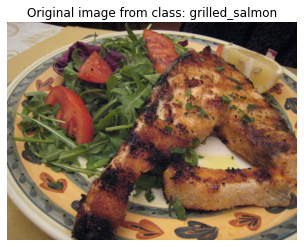

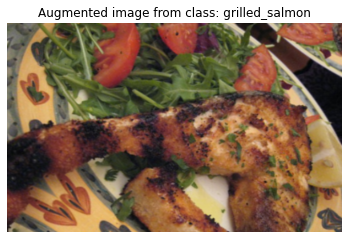

In [26]:
target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
rand_img = random.choice(os.listdir(target_dir))
rand_img_path = target_dir + "/" + rand_img

img = mpimg.imread(rand_img_path)
plt.imshow(img)
plt.title(f"Original image from class: {target_class}")
plt.axis(False);

# PLotting our augmented image

aug_img = data_augment(tf.expand_dims(img, 0), tf.float32)
plt.figure()
plt.title(f"Augmented image from class: {target_class}")
plt.imshow(tf.squeeze(aug_img)/255.)
plt.axis(False);

In [27]:
model_1_base = tf.keras.applications.EfficientNetB0(include_top=False)
input_shape = (224, 224, 3)

model_1_base.trainable = False
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augment(inputs)
x = model_1_base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="GAPT")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                   experiment_name="1PerDataAug")])

Saving TensorBoard log files to: transfer_learning/1PerDataAug/20221203-183848
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.4548 - accuracy: 0.0571 - val_loss: 2.2072 - val_accuracy: 0.1924
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1916 - accuracy: 0.2429 - val_loss: 2.0993 - val_accuracy: 0.2418
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9637 - accuracy: 0.4429 - val_loss: 1.9803 - val_accuracy: 0.3191
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7795 - accuracy: 0.5143 - val_loss: 1.8801 - val_accuracy: 0.3947
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6362 - accuracy: 0.6143 - val_loss: 1.7819 - val_accuracy: 0.4918


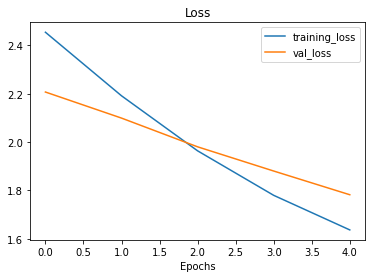

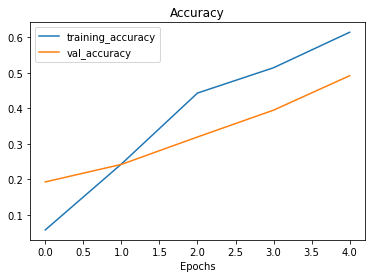

In [28]:
plot_loss_curves(history_1)

In [29]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GAPT (GlobalAveragePooling2  (None, 1280)             0         
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [30]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 1.8056 - accuracy: 0.4620


[1.8056154251098633, 0.4620000123977661]

### Model_2: 10% training data with augementation

In [31]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir_10_per = "10_food_classes_10_percent/train"
test_dir_10_per = "10_food_classes_10_percent/test"

train_data_2 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_per,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE)

test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_per,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [32]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2)
], name="data_augmentation_layer")

In [102]:
base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False

inputs_10 = tf.keras.layers.Input(shape=(224,224,3), name="input_Layer")
x = data_augmentation(inputs_10)
x = base_model_2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="GAPT_2")(x)
outputs_10 = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs_10, outputs_10)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='10perModelcheckPointsWeights/checkpoint.ckpt',
                                                               save_weights_only=True,
                                                               save_best_only=True,
                                                               save_freq="epoch")

history_2 = model_2.fit(train_data_2,
                        epochs=5,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data_2,
                        validation_steps=int(0.25 * len(test_data_2)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                   experiment_name="10PerDataAug"),
                                   model_checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10PerDataAug/20221203-200002
Epoch 1/5
24/24 [==============================] - 16s 397ms/step - loss: 1.9575 - accuracy: 0.3800 - val_loss: 1.3883 - val_accuracy: 0.6859
Epoch 2/5
24/24 [==============================] - 8s 330ms/step - loss: 1.2954 - accuracy: 0.6973 - val_loss: 0.9908 - val_accuracy: 0.7582
Epoch 3/5
24/24 [==============================] - 11s 452ms/step - loss: 0.9877 - accuracy: 0.7707 - val_loss: 0.8290 - val_accuracy: 0.7845
Epoch 4/5
24/24 [==============================] - 8s 327ms/step - loss: 0.8236 - accuracy: 0.8067 - val_loss: 0.6889 - val_accuracy: 0.8191
Epoch 5/5
24/24 [==============================] - 8s 321ms/step - loss: 0.7176 - accuracy: 0.8320 - val_loss: 0.6724 - val_accuracy: 0.8125


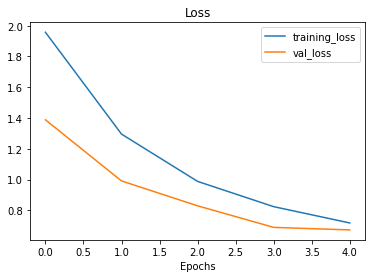

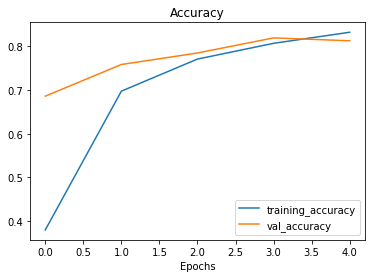

In [103]:
plot_loss_curves(history_2)

In [104]:
base_model = model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5525 - accuracy: 0.8612


In [105]:
model_1_data_aug_one_percent = model_1.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 1.8056 - accuracy: 0.4620


In [106]:
model_2_data_aug_1o_percent = model_2.evaluate(test_data_2)

79/79 [==============================] - 6s 76ms/step - loss: 0.6321 - accuracy: 0.8288


Till here our base model that is only "10 percent training data" is working great

#### Loading in checkpointed weights

Loading in checkpointed weight return a model to a specific checkpoint

In [107]:
model_2.load_weights("10perModelcheckPointsWeights/checkpoint.ckpt") 

In [108]:
loaded_weight_model_2 = model_2.evaluate(test_data_2)

79/79 [==============================] - 6s 75ms/step - loss: 0.6321 - accuracy: 0.8288


In [40]:
np.round(loaded_weight_model_2, 2)

array([0.62, 0.84])

In [109]:
np.isclose(np.array(model_2_data_aug_1o_percent), np.array(loaded_weight_model_2))

array([ True,  True])

### Model_3: Fine tuning with 10% data and with data augmentation

In [110]:
# Are these layers trainable?

for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f8449226a60> True
<keras.engine.sequential.Sequential object at 0x7f844911f280> True
<keras.engine.functional.Functional object at 0x7f82df791a30> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f82df8a1430> True
<keras.layers.core.dense.Dense object at 0x7f82dfbd4b80> True


In [111]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [112]:
# Unfreezing last 10 layers
base_model_2.trainable = True

for layer in base_model_2.layers[:-10]:
  layer.trainable = False

# Recompiling model 

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # When fine-tuning you typically want to lower learning rate by 10x (rule of thumb)
                metrics=["accuracy"])

In [113]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [114]:
print(len(model_2.trainable_variables))

12


In [115]:
fine_tune_epochs = 10

# Refiting our model (same as model 2 with more trainable layers)

history_3 = model_2.fit(train_data_2,
                        epochs=fine_tune_epochs,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data_2,
                        validation_steps=int(0.25 * len(test_data_2)),
                        initial_epoch=history_2.epoch[-1], # Start training from previous last epoch
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_per_last_layer_model3")])

Saving TensorBoard log files to: transfer_learning/10_per_last_layer_model3/20221203-200248
Epoch 5/10
24/24 [==============================] - 18s 490ms/step - loss: 0.6128 - accuracy: 0.8280 - val_loss: 0.5594 - val_accuracy: 0.8306
Epoch 6/10
24/24 [==============================] - 8s 328ms/step - loss: 0.4907 - accuracy: 0.8613 - val_loss: 0.5191 - val_accuracy: 0.8372
Epoch 7/10
24/24 [==============================] - 8s 305ms/step - loss: 0.4442 - accuracy: 0.8680 - val_loss: 0.5368 - val_accuracy: 0.8289
Epoch 8/10
24/24 [==============================] - 8s 332ms/step - loss: 0.3769 - accuracy: 0.8973 - val_loss: 0.5072 - val_accuracy: 0.8355
Epoch 9/10
24/24 [==============================] - 7s 280ms/step - loss: 0.3435 - accuracy: 0.8960 - val_loss: 0.5151 - val_accuracy: 0.8355
Epoch 10/10
24/24 [==============================] - 8s 309ms/step - loss: 0.3502 - accuracy: 0.8973 - val_loss: 0.5520 - val_accuracy: 0.8207


In [116]:
model_3_fine_tune_10_layer = model_2.evaluate(test_data_2)

79/79 [==============================] - 6s 74ms/step - loss: 0.4565 - accuracy: 0.8524


In [58]:
base_model

[0.5525487065315247, 0.8611999750137329]

In [59]:
model_2_data_aug_1o_percent

[0.6245432496070862, 0.8420000076293945]

In [60]:
model_3_fine_tune_10_layer

[0.417892187833786, 0.8623999953269958]

Now our we have break our base model accuracy by fine tuning. Now onwards in our experiment base model will be considered as Model_3 (Fine Tuning of layers with data augmentation)

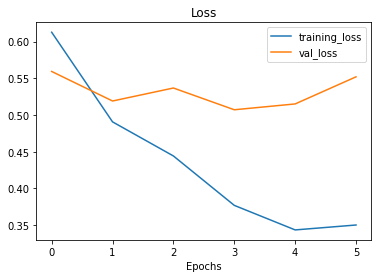

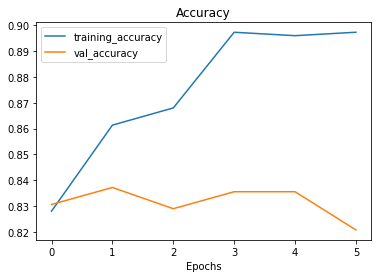

In [117]:
plot_loss_curves(history_3)

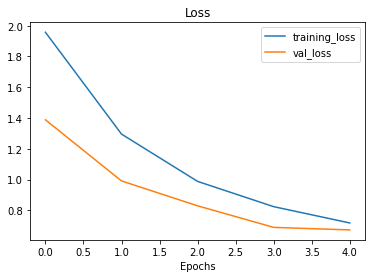

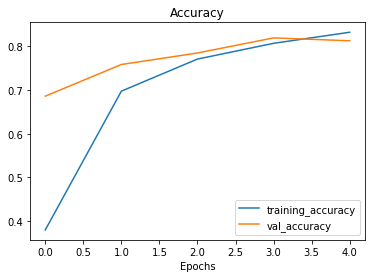

In [118]:
plot_loss_curves(history_2)

*Bug in my plot_loss_curves function. It can't understand that we have 5 epochs from where training has start we need to allow our fucntion to understand this thing*

In [71]:
def compare_history(original_history, new_history, initial_epochs):
  """
  compare two tensorflow History objects
  """

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine orgiginal history

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Training Val_Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Valdation accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Training Val_Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="Upper right")
  plt.title("Training and Valdation Loss")

<ipython-input-71-a7104cdf2c2d>:33: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="Upper right")


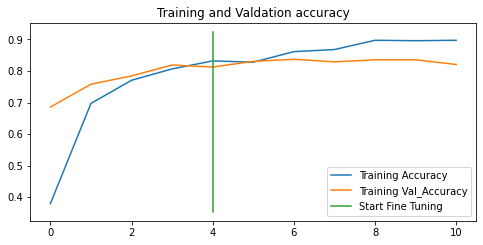

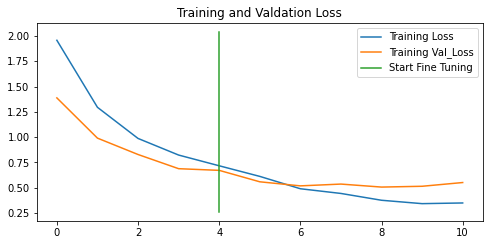

In [119]:
compare_history(history_2, history_3, 5)

### Model_4: Using more data with with 100% Training data

In [120]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-12-03 20:04:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2022-12-03 20:05:01 (167 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [77]:
unzip_data("10_food_classes_all_data.zip")

In [78]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [121]:
train_dir_all = "10_food_classes_all_data/train"
test_dir_all = "10_food_classes_all_data/test"

In [129]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

In [130]:
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                     label_mode="categorical",
                                                                     image_size=IMG_SHAPE)

test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                     label_mode="categorical",
                                                                     image_size=IMG_SHAPE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [131]:
model_2.load_weights("10perModelcheckPointsWeights/checkpoint.ckpt")

In [132]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 9s 74ms/step - loss: 0.6321 - accuracy: 0.8288


[0.6320896744728088, 0.8288000226020813]

In [125]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 input_Layer True
1 data_augmentation_layer True
2 efficientnetb0 True
3 GAPT_2 True
4 output_layer True


In [126]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

Our model is still trainable

In [133]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [134]:
history_4 = model_2.fit(train_data_all,
                        epochs=fine_tune_epochs,
                        steps_per_epoch=len(train_data_all),
                        validation_data=test_data_all,
                        validation_steps=int(0.25 * len(test_data_all)),
                        initial_epoch=history_2.epoch[-1], # Start training from previous last epoch
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_model_4_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/10_model_4_fine_tuning/20221203-201150
Epoch 5/10
235/235 [==============================] - 61s 231ms/step - loss: 0.6566 - accuracy: 0.7883 - val_loss: 0.3296 - val_accuracy: 0.8947
Epoch 6/10
235/235 [==============================] - 47s 199ms/step - loss: 0.5290 - accuracy: 0.8315 - val_loss: 0.3202 - val_accuracy: 0.8898
Epoch 7/10
235/235 [==============================] - 49s 205ms/step - loss: 0.4718 - accuracy: 0.8493 - val_loss: 0.2787 - val_accuracy: 0.9112
Epoch 8/10
235/235 [==============================] - 46s 194ms/step - loss: 0.4330 - accuracy: 0.8635 - val_loss: 0.2849 - val_accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 42s 175ms/step - loss: 0.3977 - accuracy: 0.8715 - val_loss: 0.2566 - val_accuracy: 0.9128
Epoch 10/10
235/235 [==============================] - 41s 172ms/step - loss: 0.3629 - accuracy: 0.8824 - val_loss: 0.2474 - val_accuracy: 0.9128


<ipython-input-71-a7104cdf2c2d>:33: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="Upper right")


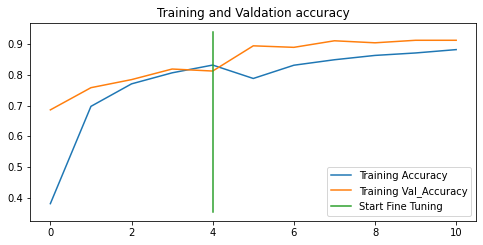

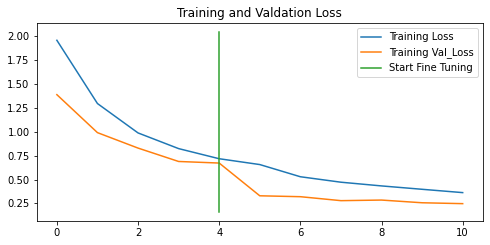

In [135]:
compare_history(history_2, history_4, 5)

In [136]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 6s 73ms/step - loss: 0.2643 - accuracy: 0.9120


[0.26429855823516846, 0.9120000004768372]

Yes, We have achieved **91.2%** Accuracy in our model and by plot curves they are learning at their best

## Finalizing and viewing our experiments on Tensorboard

In [138]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experimetn with 10 Food 101 Classes" \
  --description " A series of different transfer learning experiments with varying amount of data and fine tuning" \
  --one_shot # exists the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=STaZ4an1bZThZ3aCqsJuw4TQVSmVn8&prompt=consent&access_type=o

In [139]:
!tensorboard dev list

https://tensorboard.dev/experiment/A0CNPpEGRDGfryQ1jsAJrA/
	Name                 Transfer Learning Experimetn with 10 Food 101 Classes
	Description           A series of different transfer learning experiments with varying amount of data and fine tuning
	Id                   A0CNPpEGRDGfryQ1jsAJrA
	Created              2022-12-03 20:25:08 (12 minutes ago)
	Updated              2022-12-03 20:25:15 (12 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              228
	Tensor bytes         0
	Binary object bytes  6161067
Total: 1 experiment(s)


In [141]:
# for deleting your experiment from tensorboard use below commands. As tensoboard is public
# !tensorboard dev delete --experiment_id A0CNPpEGRDGfryQ1jsAJrA